# Part II - Factors determining the duration of rides
## by Akwayaga Collinus Ajinjue

## Investigation Overview

> In this investigation, I wanted to look at the factors determining the duration of rides. My main focus was on days of the week and hours of the day when the rides started, and the type of rider or user.


## Dataset Overview

> The data consisted of duration in seconds and attributes of 183,412 rides. The attributes included start_time from which I extracted the days of the week and hours of the day when the rides started. The attributes also contained user_type. 8,460 data points were removed from the analysis due to missing information.

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
ford_gobike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_gobike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [13]:
# create a copy of dataset
new_gobike_df = ford_gobike_df.copy()
# convert the user_type to categorical
new_gobike_df['user_type'] = new_gobike_df['user_type'].astype('category')

# convert start_time and end_time columns to datetime type
date_columns = ['start_time','end_time']
for date_column in date_columns:
    new_gobike_df[date_column] = pd.to_datetime(new_gobike_df[date_column])

# Create new features from the start_time column
new_gobike_df['start_month'] = new_gobike_df.start_time.dt.month_name()
new_gobike_df['start_day_of_week'] = new_gobike_df.start_time.dt.day_name()
new_gobike_df['start_hour'] = new_gobike_df.start_time.dt.hour


# Convert new features to ordered categorical variables
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
ordinal_var_dict = {
                   'start_day_of_week': week_days,
                   'start_hour' : day_hours
                   }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    new_gobike_df[var] = new_gobike_df[var].astype(ordered_var)


# drop rows with nan values
new_gobike_df = new_gobike_df.dropna()

## Distribution of Duration of rides
> Duration of rides in the dataset take on a very large range of values, from about  61 seconds as minimum to 85,444 seconds as the maximum. Plotted on a logarithmic scale, the distribution of duration of rides takes on the shape of a fairly normal distribution.
> - The distribution has a peak around 500 seconds

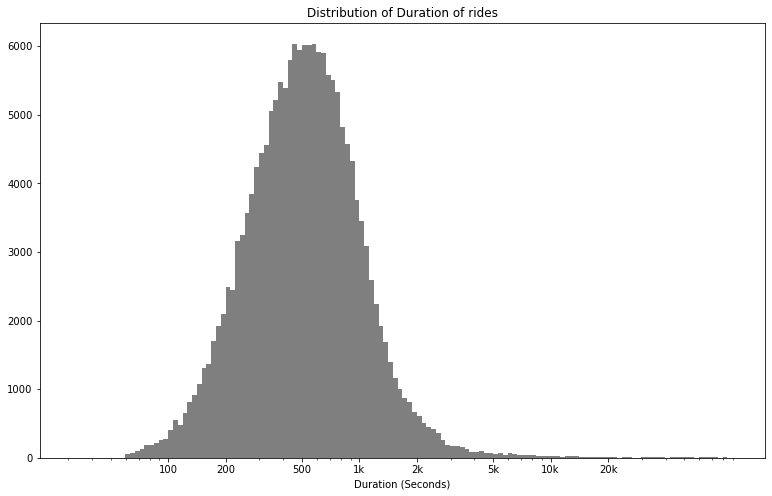

In [14]:
# default color
base_color = sb.color_palette()[7]
# distribution of duration on a log scale
log_binsize = 0.025
bin_edges = 10 ** np.arange(1.5, np.log10(new_gobike_df.duration_sec.max())+log_binsize, log_binsize)
plt.figure(figsize=[13, 8])
plt.hist(data = new_gobike_df, x = 'duration_sec', bins = bin_edges, color=base_color)
plt.xscale('log')
plt.xticks([100, 200, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [100, 200, 500,'1k','2k','5k','10k','20k'])
plt.xlabel('Duration (Seconds)')
plt.title('Distribution of Duration of rides')
plt.show()

## Distribution of User Type

> `90.53%` of the riders or user type are Subscribers and `9.47%` are Customers

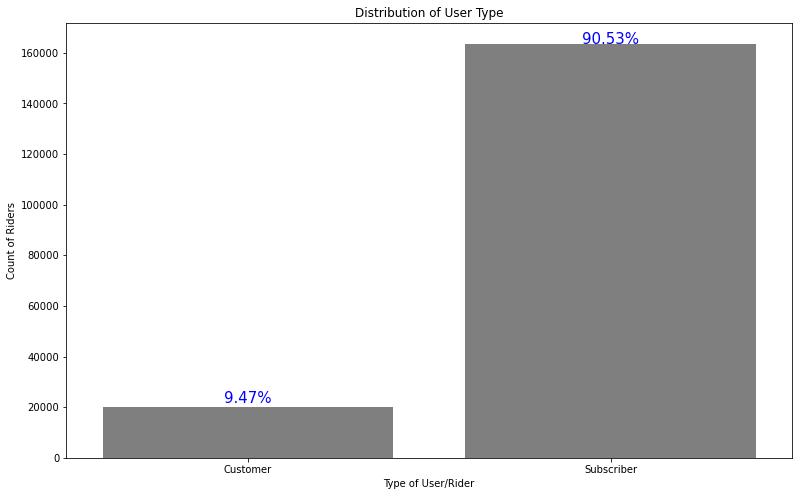

In [15]:
# proportions of user types
user_counts = new_gobike_df.user_type.value_counts()
tot_user = new_gobike_df.user_type.value_counts().sum()
# plot user_type's distribution
plt.figure(figsize=(13,8))
sb.countplot(data=ford_gobike_df, x='user_type', color=base_color)

locs, labels = plt.xticks()

# print proportion text on the bars
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100 * count/tot_user)
    # print the annotation on top of the bars
    plt.text(loc, count+5000, pct_string, ha='center', color='blue', size=15)
plt.xlabel('Type of User/Rider')
plt.ylabel('Count of Riders')
plt.title('Distribution of User Type')
plt.show()

## Relationship between Duration of rides, and days of the week and hours of the day
> - The median duration of rides increases gradually through the working days of the week (Monday, Tuesday, Wednesday, Thursday, and Friday). It then increases a little faster at weekends.
> - From midnight to 4:00 am, there is a fall in the median duration of rides, after that the median duration of rides increases till 6:00 pm before it starts falling again.





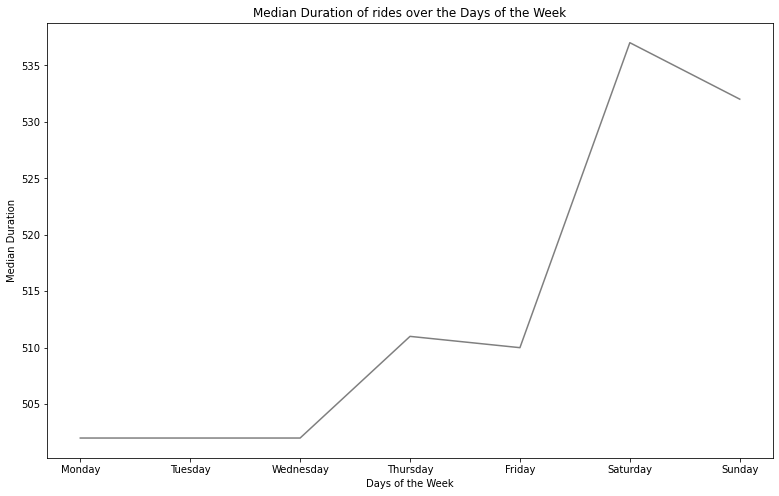

In [16]:
# cleaned data set
new_gobike_df = new_gobike_df.query('duration_sec <= 10000')

# function to plot charts
def line_plot(df, x, xlabel, ylabel, title):
    sb.lineplot(data=df, x=x, y='duration_sec', color=base_color, estimator=np.median, ci=None)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# line plots 
plt.figure(figsize=[13,8])
line_plot(new_gobike_df, 'start_day_of_week','Days of the Week','Median Duration',
          'Median Duration of rides over the Days of the Week')

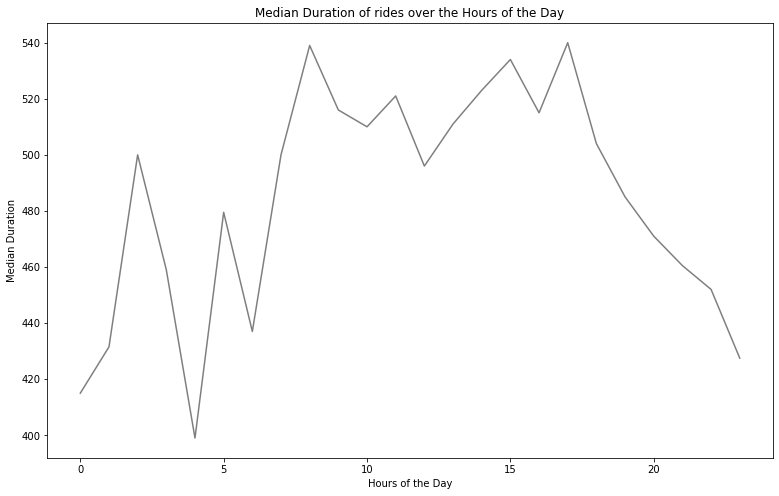

In [17]:
# line plots 
plt.figure(figsize=[13,8])
line_plot(new_gobike_df, 'start_hour','Hours of the Day','Median Duration',
          'Median Duration of rides over the Hours of the Day')

Further investigation of the median duration of rides between the 4th and 18th hours, across the days of the week and hours of the day to see if the patterns above are dependent on whether the user type is a Customer or a Subscriber.
> - The median duration of rides increases across the days of the days of the week for the Customers, but it is almost constant with the Subscribers
> - Similarly, the median duration of rides increases between the 4th and 18th hours of the day for Customers, but it is fairly constant for the Subscribers

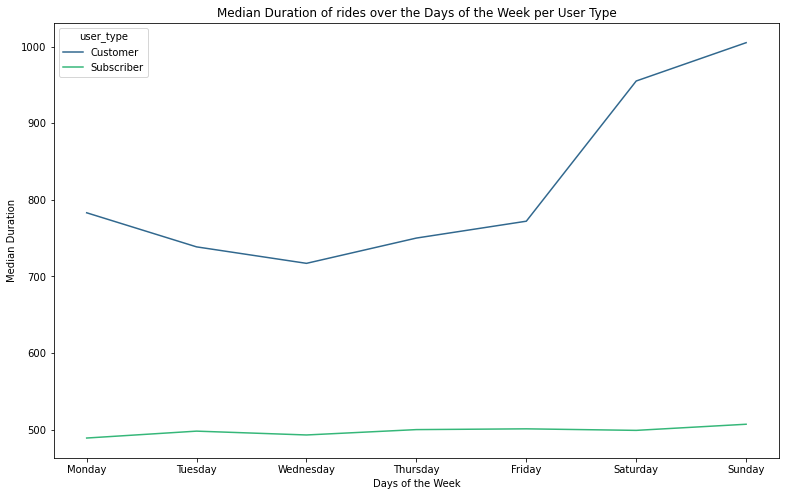

In [18]:
# filter out subset of dataframe
new_gobike_df = new_gobike_df.query('(start_hour > 4) & (start_hour < 18)')

# function to plot charts
def line_plot2(df, x, xlabel, ylabel, title):
    sb.lineplot(data=df, x=x, y='duration_sec', color=base_color, estimator=np.median, ci=None, 
                hue='user_type', palette='viridis')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# line plot
plt.figure(figsize=[13,8])
line_plot2(new_gobike_df, 'start_day_of_week', 'Days of the Week', 'Median Duration',
          'Median Duration of rides over the Days of the Week per User Type')
    

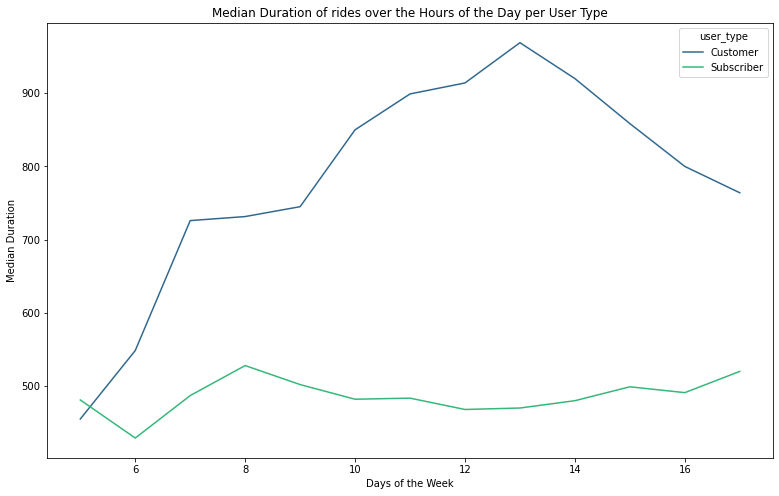

In [19]:
# line plot
plt.figure(figsize=[13,8])
line_plot2(new_gobike_df, 'start_hour', 'Days of the Week', 'Median Duration',
          'Median Duration of rides over the Hours of the Day per User Type')
    

In [21]:
!jupyter nbconvert slide_deck_project.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook slide_deck_project.ipynb to slides
[NbConvertApp] Writing 756572 bytes to slide_deck_project.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User1\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User1\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User1\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User1\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\User1\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "